In [1]:
import math
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import odeint
import sys
from IPython.display import Image
from IPython.core.display import HTML 

# Data

In [2]:
data = pd.read_csv('italy.csv', index_col=0)
data = data[9:]  # инфекции появляются только на десятый день
data['Заражений'] -= (data['Выздоровлений'] + data['Смертей'])


Infected = data['Заражений']
Recovered = data['Выздоровлений']
Death = data['Смертей']

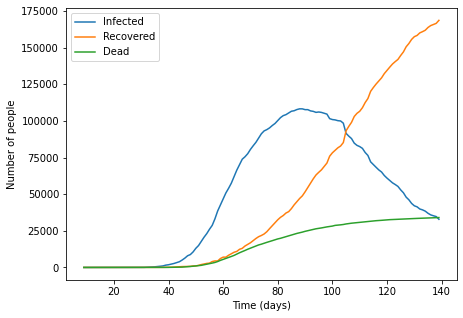

In [3]:
plt.figure(figsize=(7, 5))
plt.plot(Infected, label='Infected')
plt.plot(Recovered, label='Recovered')
plt.plot(Death, label='Dead')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()

# Generalized SEIR model

In [4]:
Image(url= "https://i.imgur.com/66y03Et.png")

In [5]:
# Italy's population
N=60461826

# diff equations
def diff_equation(y, t, *params):
    P, S, E, I, Q, R, D = y
    alpha_, beta_, gamma_, delta_, lambda_, k_ = params

    dP = alpha_*S
    dS = -(beta_*(I/N) + alpha_)*S
    dE = beta_*(I/N)*S - gamma_*E
    dI = gamma_*E - delta_*I
    dQ = delta_*I - (lambda_ + k_)*Q
    dR = lambda_*Q
    dD = k_*Q

    dydt = [dP, dS, dE, dI, dQ, dR, dD]
    
    return dydt


t = np.arange(data.shape[0])[:-10] # train
y0 = [0.01*(N-2), 0.99*(N-2), 2, 0, 0, 0, 0] # [P, S, E, I, Q, R, D]

# alpha, beta, gamma, delta, lambda, k
params = [np.linspace(0.01, 0.15, 10), np.linspace(1, 1.8, 20), np.linspace(0.1, 0.5, 10), 
          np.linspace(0.1, 0.5, 10), np.linspace(0.001, 0.6, 10), np.linspace(0.0001, 0.03, 5)]

#sol = odeint(diff_equation, y0, t, args=initial_params)

In [6]:
def RMSE(A, B):
    return np.sqrt(((A - B)**2).mean())

In [7]:
from sklearn.model_selection import ParameterGrid

err = []
param_grid = {'alpha': params[0], 'beta': params[1], 'gamma': params[2], 'delta': params[3],
             'lambda': params[4], 'k': params[5]}
grid = ParameterGrid(param_grid)

for i, parameters in enumerate(grid):
    
    sol = odeint(diff_equation, 
                 y0, 
                 t, 
                 args=(parameters['alpha'], parameters['beta'], parameters['gamma'], parameters['delta'],
                       parameters['lambda'], parameters['k']))

    i_err = RMSE(Infected[:-10], sol[:, 2] + sol[:, 3] + sol[:, 4])
    r_err = RMSE(Recovered[:-10], sol[:, 5])
    d_err = RMSE(Death[:-10], sol[:, 6])
    
    if i % 5000 == 0:
        print('------------------')
        print('%s steps' %i)
        print('RMSE for Dead:', d_err)
        print('RMSE for Recovered:', r_err)
        print('RMSE for Infected:', i_err)

    err.append((i_err, r_err, d_err))

------------------
0 steps
RMSE for Dead: 18372.51686707796
RMSE for Recovered: 53572.00936741035
RMSE for Infected: 3272211.294688622
------------------
5000 steps
RMSE for Dead: 17949.802387807442
RMSE for Recovered: 48654.56188439996
RMSE for Infected: 4537898.710733179
------------------
10000 steps
RMSE for Dead: 17394.896532442734
RMSE for Recovered: 42667.183551066235
RMSE for Infected: 5895666.5281962
------------------
15000 steps
RMSE for Dead: 16710.72613428219
RMSE for Recovered: 36571.036081809434
RMSE for Infected: 7250663.943315004
------------------
20000 steps
RMSE for Dead: 15921.092217152813
RMSE for Recovered: 32786.71468537058
RMSE for Infected: 8544406.885586798
------------------
25000 steps
RMSE for Dead: 15070.709498550119
RMSE for Recovered: 34902.5850787286
RMSE for Infected: 9752913.18272216
------------------
30000 steps
RMSE for Dead: 14222.4911382311
RMSE for Recovered: 44207.86375753221
RMSE for Infected: 10872733.215657333
------------------
35000 steps

------------------
295000 steps
RMSE for Dead: 19233.95317261706
RMSE for Recovered: 64073.68406279097
RMSE for Infected: 56031.07378864087
------------------
300000 steps
RMSE for Dead: 19256.08570209391
RMSE for Recovered: 64312.54574003751
RMSE for Infected: 65766.3685608073
------------------
305000 steps
RMSE for Dead: 19256.043838312453
RMSE for Recovered: 64312.11934342574
RMSE for Infected: 65754.79821311346
------------------
310000 steps
RMSE for Dead: 19255.996406055536
RMSE for Recovered: 64311.63556482238
RMSE for Infected: 65741.53348598472
------------------
315000 steps
RMSE for Dead: 19255.942718133818
RMSE for Recovered: 64311.08724421279
RMSE for Infected: 65726.34612060135
------------------
320000 steps
RMSE for Dead: 19255.88200870674
RMSE for Recovered: 64310.46639341695
RMSE for Infected: 65708.97953922914
------------------
325000 steps
RMSE for Dead: 19255.81342490044
RMSE for Recovered: 64309.76410695096
RMSE for Infected: 65689.14559954168
------------------

------------------
590000 steps
RMSE for Dead: 19255.989036610354
RMSE for Recovered: 64311.62677331329
RMSE for Infected: 65754.61714312984
------------------
595000 steps
RMSE for Dead: 19255.958563119362
RMSE for Recovered: 64311.32214450973
RMSE for Infected: 65747.54088676727
------------------
600000 steps
RMSE for Dead: 19256.31417734592
RMSE for Recovered: 64314.86405177646
RMSE for Infected: 65827.37875614094
------------------
605000 steps
RMSE for Dead: 19256.309288463588
RMSE for Recovered: 64314.815996162855
RMSE for Infected: 65826.41359473155
------------------
610000 steps
RMSE for Dead: 19256.304077834397
RMSE for Recovered: 64314.76475391169
RMSE for Infected: 65825.38011234456
------------------
615000 steps
RMSE for Dead: 19256.298526794533
RMSE for Recovered: 64314.71013888158
RMSE for Infected: 65824.27408058045
------------------
620000 steps
RMSE for Dead: 19256.29261572026
RMSE for Recovered: 64314.651955295216
RMSE for Infected: 65823.09104049912
-------------

------------------
885000 steps
RMSE for Dead: 19256.28135808822
RMSE for Recovered: 64314.54555407385
RMSE for Infected: 65821.72436616557
------------------
890000 steps
RMSE for Dead: 19256.276510111333
RMSE for Recovered: 64314.4980911118
RMSE for Infected: 65820.80650945744
------------------
895000 steps
RMSE for Dead: 19256.271455323214
RMSE for Recovered: 64314.448592539346
RMSE for Infected: 65819.84737732861
------------------
900000 steps
RMSE for Dead: 19256.344769705738
RMSE for Recovered: 64315.16534625379
RMSE for Infected: 65833.53082406378
------------------
905000 steps
RMSE for Dead: 19256.343048884577
RMSE for Recovered: 64315.14861450233
RMSE for Infected: 65833.22744900454
------------------
910000 steps
RMSE for Dead: 19256.34125778619
RMSE for Recovered: 64315.131195465656
RMSE for Infected: 65832.91092655626
------------------
915000 steps
RMSE for Dead: 19256.33939399241
RMSE for Recovered: 64315.11306537422
RMSE for Infected: 65832.58078086941
---------------

In [34]:
np.save('italy_err', err)

In [8]:
opt_i = grid[np.argmin(err, axis=0)[0]]
opt_r = grid[np.argmin(err, axis=0)[1]]
opt_d = grid[np.argmin(err, axis=0)[2]]

In [17]:
ls = [(a+b+c)/3 for a, b, c in err]
opt_avg = grid[np.argmin(ls, axis=0)]

# Good fit: average

In [35]:
# now, to draw we use full dataset
t = np.arange(data.shape[0])

(1, 484717.7035191303)

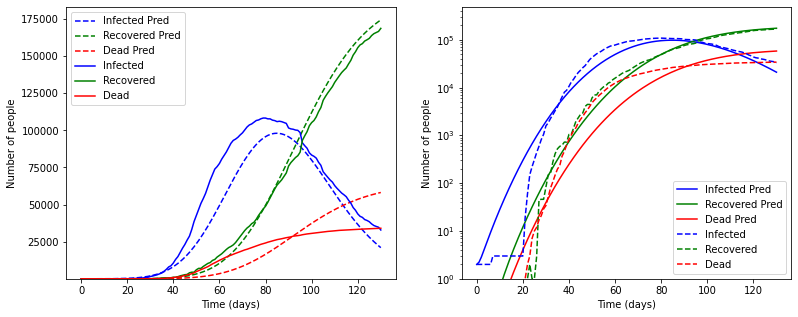

In [54]:
sol = odeint(diff_equation, 
             y0, 
             t, 
             args=(opt_avg['alpha'], opt_avg['beta'], opt_avg['gamma'], opt_avg['delta'],
                   opt_avg['lambda'], opt_avg['k']))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)


plt.subplot(1,2,2)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r', label='Dead Pred')
plt.plot(t, Infected, 'b--', label='Infected')
plt.plot(t, Recovered, 'g--', label='Recovered')
plt.plot(t, Death, 'r--', label='Dead')
plt.semilogy()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

In [45]:
print('RMSE for infected on last 10 days:', RMSE(Infected[-10:], sol[:, 2][-10:] + sol[:, 3][-10:] + sol[:, 4][-10:]))
print('RMSE for recovered on last 10 days:', RMSE(Recovered[-10:], sol[:, 5][-10:]))
print('RMSE for dead on last 10 days:', RMSE(Death[-10:], sol[:, 6][-10:]))

RMSE for infected on last 10 days: 10297.54532123022
RMSE for recovered on last 10 days: 5817.790138216803
RMSE for dead on last 10 days: 22540.458036991527


In [53]:
print('Train RMSE scores:')
err[np.argmin(ls, axis=0)]

Train RMSE scores:


(12709.315679474952, 4458.634434873493, 7710.68722199553)

In [49]:
print('best parameters:')
{k:round(v, 4) for k, v in opt_avg.items()}

best parameters:


{'lambda': 0.0676,
 'k': 0.0225,
 'gamma': 0.2333,
 'delta': 0.1444,
 'beta': 1.1263,
 'alpha': 0.0256}

(1, 1589668.9244435157)

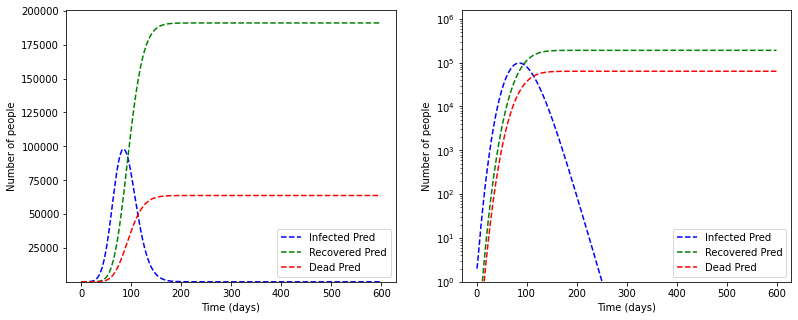

In [60]:
# predicting epidemic end
# I choose best parameters and big t

t = np.arange(600)

sol = odeint(diff_equation, 
             y0, 
             t = t, 
             args=(opt_avg['alpha'], opt_avg['beta'], opt_avg['gamma'], opt_avg['delta'],
                   opt_avg['lambda'], opt_avg['k']))



plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)


plt.subplot(1,2,2)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.semilogy()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

In [67]:
x = sol[:, 2] + sol[:, 3] + sol[:, 4]
for i, val in enumerate(x):
    if val <= 1:
        print('Epidemic will end in ~ %s days' %i)
        break

Epidemic will end in ~ 251 days


# Bad fits: infected, recovered and dead

(1, 529820.2859705486)

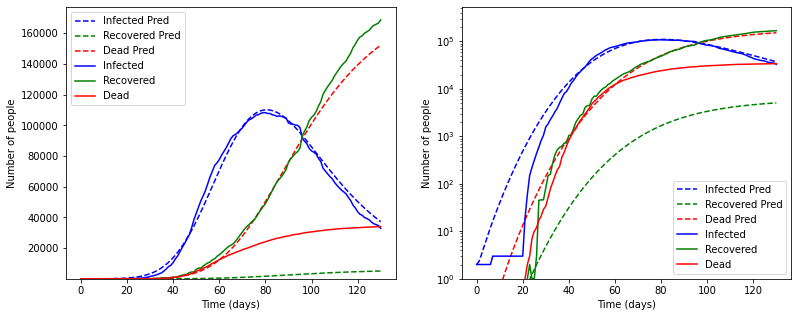

In [38]:
sol = odeint(diff_equation, 
             y0, 
             t, 
             args=(opt_i['alpha'], opt_i['beta'], opt_i['gamma'], opt_i['delta'],
                   opt_i['lambda'], opt_i['k']))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)


plt.subplot(1,2,2)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.semilogy()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

In [39]:
print('RMSE for infected on last 10 days:', RMSE(Infected[-10:], sol[:, 2][-10:] + sol[:, 3][-10:] + sol[:, 4][-10:]))
print('RMSE for recovered on last 10 days:', RMSE(Recovered[-10:], sol[:, 5][-10:]))
print('RMSE for dead on last 10 days:', RMSE(Death[-10:], sol[:, 6][-10:]))

RMSE for infected on last 10 days: 5220.00051645375
RMSE for recovered on last 10 days: 158017.544951282
RMSE for dead on last 10 days: 113031.94498561427


(1, 10744848.676146038)

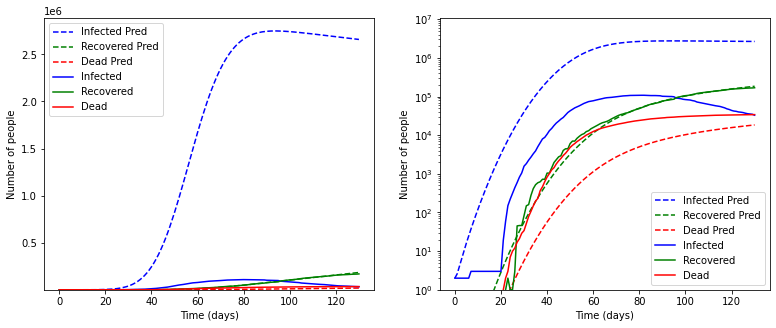

In [40]:
sol = odeint(diff_equation, 
             y0, 
             t, 
             args=(opt_r['alpha'], opt_r['beta'], opt_r['gamma'], opt_r['delta'],
                   opt_r['lambda'], opt_r['k']))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

plt.subplot(1,2,2)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.semilogy()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

In [41]:
print('RMSE for infected on last 10 days:', RMSE(Infected[-10:], sol[:, 2][-10:] + sol[:, 3][-10:] + sol[:, 4][-10:]))
print('RMSE for recovered on last 10 days:', RMSE(Recovered[-10:], sol[:, 5][-10:]))
print('RMSE for dead on last 10 days:', RMSE(Death[-10:], sol[:, 6][-10:]))

RMSE for infected on last 10 days: 2633763.5678698327
RMSE for recovered on last 10 days: 10098.103672773908
RMSE for dead on last 10 days: 16527.131981942784


(1, 868600.7789303021)

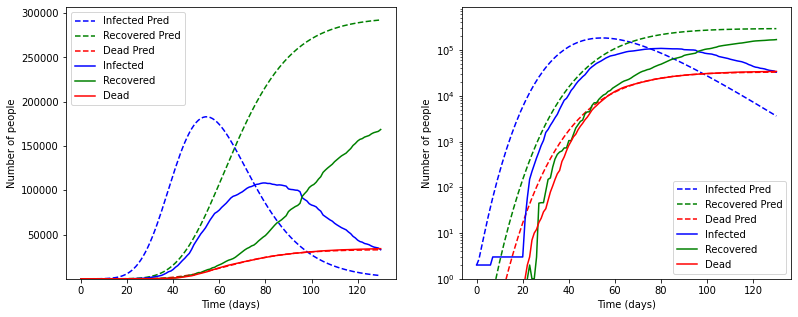

In [42]:
sol = odeint(diff_equation, 
             y0, 
             t, 
             args=(opt_d['alpha'], opt_d['beta'], opt_d['gamma'], opt_d['delta'],
                   opt_d['lambda'], opt_d['k']))

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)


plt.subplot(1,2,2)
plt.plot(t, sol[:, 2] + sol[:, 3] + sol[:, 4], 'b--',label='Infected Pred')
plt.plot(t, sol[:, 5], 'g--', label='Recovered Pred')
plt.plot(t, sol[:, 6], 'r--', label='Dead Pred')
plt.plot(t, Infected, 'b', label='Infected')
plt.plot(t, Recovered, 'g', label='Recovered')
plt.plot(t, Death, 'r', label='Dead')
plt.semilogy()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.legend()
plt.ylim(bottom=1)

In [43]:
print('RMSE for infected on last 10 days:', RMSE(Infected[-10:], sol[:, 2][-10:] + sol[:, 3][-10:] + sol[:, 4][-10:]))
print('RMSE for recovered on last 10 days:', RMSE(Recovered[-10:], sol[:, 5][-10:]))
print('RMSE for dead on last 10 days:', RMSE(Death[-10:], sol[:, 6][-10:]))

RMSE for infected on last 10 days: 32694.630830608636
RMSE for recovered on last 10 days: 128278.44830636683
RMSE for dead on last 10 days: 1085.0346329940198
